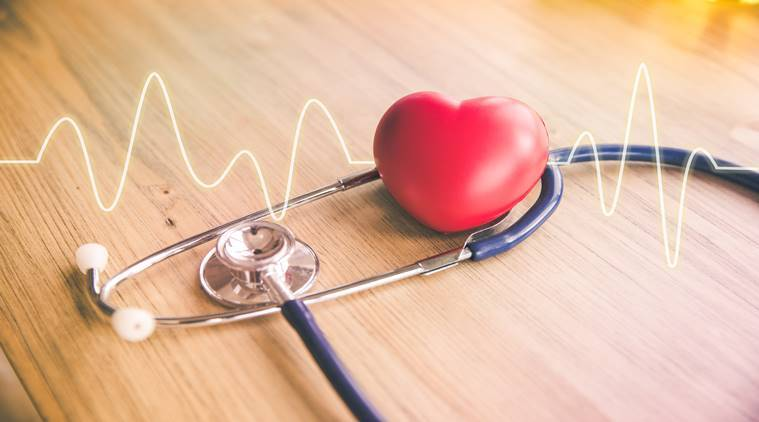

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
%matplotlib inline
#DATA MANIPULATION
import numpy as np 
import pandas as pd 

#DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

#STYLE MANIPULATIONS
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option("display.float_format", "{:.4f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

#MACHINE LEARNING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix




In [ ]:
df=pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df.head()

In [ ]:
#VARIABLES TYPES
df.dtypes.value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90)
df.dtypes.value_counts()


In [ ]:
#Take AN IDEA ABOUT THE DATA

df.shape


In [ ]:
df.isna().sum()


--> WE DON'T HAVE ANY MISSING VALUE IN OUR DATA (NAN)

In [ ]:
#A DESCRIPTION ABOUT THE DATA :
df.describe()

In [ ]:
#KNOWING THE VARIABLES BETTER:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

# **DATA VISUALIZATION :**

In [ ]:
# DEATH_EVENT VISUALIZATION:
target="DEATH_EVENT"
df[target].value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [ ]:
explode = (0, 0.07)
labels = ['Female', 'Male']
df.groupby('sex').size().plot(kind='pie',textprops={'fontsize': 20}, colors=['violet', 'blue'],explode=explode,startangle=90,labels=labels,autopct='%1.1f%%',shadow=True,label='gender')
plt.show()

-->  The pie chart shows that the number of females is less than males in these observations so we cannot decide whether the Death Event has something to do with the gender of the patients.

In [ ]:
cnt=df.groupby(['DEATH_EVENT','sex']).size() #1:male and 2:female
print(cnt)

In [ ]:
#DOES THE SEX HAVE AND EFFECT ON THE DEATH_EVENT(TARGET) ? 
plt.figure(figsize=(30,20))
plt.subplot(4, 4, 5)
plt.hist(df[df["sex"]==1]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="Male",color='blue')
plt.hist(df[df["sex"]==0]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="Female",color='violet')
plt.title('sex and death_event')
plt.legend()


#DOES THE ANAEMIA HAVE AN EFFECT ON THE DEATH_EVENT ?
plt.subplot(4, 4,1)
plt.hist(df[df["anaemia"]==1]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="Yes",color='darkblue')
plt.hist(df[df["anaemia"]==0]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="No",color='pink')
plt.title('anaemia and death_event')
plt.legend()

#DOES THE DIABETES HAVE AN EFFECT ON THE DEATH_EVENT ? 
plt.subplot(4, 4, 2)
plt.hist(df[df["diabetes"]==1]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="Yes",color='crimson')
plt.hist(df[df["diabetes"]==0]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="No",color='plum')
plt.title('diabetes and death_event')
plt.legend()


#DOES THE HIGH_BLOOD_PRESSURE HAVE AN EFFECT ON THE DEATH_EVENT ? 
plt.subplot(4, 4, 3)
plt.hist(df[df["high_blood_pressure"]==1]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="Yes",color='red')
plt.hist(df[df["high_blood_pressure"]==0]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="No",color='black')
plt.title('HBP and death_event')
plt.legend()


#DOES THE SMOKING HAVE AN EFFECT ON THE DEATH_EVENT ?
plt.subplot(4, 4, 4)
plt.hist(df[df["smoking"]==1]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="Yes",color='red')
plt.hist(df[df["smoking"]==0]["DEATH_EVENT"].reset_index(drop=True), alpha=0.6, label="No",color='black')
plt.title('smoking and death_event')
plt.legend()
plt.show()


_  the plots above show us the effect of each feature on death event. we mentioned earlier that sex can't be a judge in this study in particular because the number of males and female is not the same. Second we couldn't say that anaemia causes heart failure but we can definitely see that patients who had anaemia represent the majority of the death event cases compared with patients who had not. the same thing could be said about patients who suffer from diabetes and high blood pressure. for the smoking feature it is not the case according to the plot 'smoking and death event' but we can see that an important number of patients who died from heart failure were smokers.

--> then we can assume as mentioned before that those features and maybe others could worsen the case of patients susceptible to die because of heart failure, but can't say if any o them lead to heart failure alone.

In [ ]:
#WE WANT TO SEE THE RELATIONS BETWEEN THE FEATURES
sns.pairplot(df, hue="DEATH_EVENT")
plt.show()

# **CORRELATION:**

In [ ]:
plt.figure(figsize=(10,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True,mask=np.triu(np.ones_like(correlation, dtype=np.bool)), fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.show()

--> The heatmap shows the correlation between the features if we consider the correlation between Death Event and other features, we can see that only time has a low negative correlation (to the death event(target)); serum creatinine has a low correlation with it and finally ejection fraction has also a low correlation but negatively.

# DATA PREPROCESSING :

In [ ]:
X=df.drop(['DEATH_EVENT'],axis=1)
y=df['DEATH_EVENT']

**SPLIT THE DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

# BUILDING THE MODEL :

### LOGISTIC REGRESSION:

In [ ]:
X=df[['creatinine_phosphokinase','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']].values
y=df[['DEATH_EVENT']].values
#SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
y_train=y_train.ravel()
y_test=y_test.ravel()




In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [ ]:
#SCORE
model.score(X_test,y_test)

In [ ]:
plt.figure(figsize=(10,8))
n=40
plt.plot(y_test[:n])
plt.plot(y_pred[:n],'o')
plt.show()

In [ ]:
#COEFFICIENT
print(model.coef_,model.intercept_)

### RandomForestClassifier:

In [ ]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

In [ ]:
#SCORE 
model.score(X_test,y_test)

#### ACCURACY:

In [ ]:
cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5,scoring='accuracy')

In [ ]:
#ACCURACY MEAN:
cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5,scoring='accuracy').mean()

In [ ]:
#PLOT
k=np.arange(1,50)
train_score, val_score=validation_curve(RandomForestClassifier(),X_train,y_train,'n_estimators',k,cv=5)
plt.plot(k,val_score.mean(axis=1),label='val')
plt.plot(k,train_score.mean(axis=1),label='train')
plt.legend()
plt.show()